<a href="https://colab.research.google.com/github/gianmarco-holm/PY03_MachineLearning_LinearRegression_PatientCosts/blob/main/PY03_MachineLearning_LinearRegression_PatientCosts_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal: predecir los gastos médicos de pacientes
---

Para este proyecto utilizaremos los datos presentados en [este](https://www.kaggle.com/mirichoi0218/insurance) dataset de Kaggle en el cual se presentan datos de seguros médicos.


## Descarga e instalación de librerías

Lo primero que se hará es descargar la librería **[regressors](https://pypi.org/project/regressors/)** que ayudará a hacer un análisis más profundo sobre la regresión lineal.

In [ ]:
#!pip install --upgrade pip setuptools==57.5.0

In [ ]:
!pip install regressors

  Preparing metadata (setup.py) ... done
  Created wheel for regressors: filename=regressors-0.0.3-py2.py3-none-any.whl size=12398 sha256=1f78890b19cb4f2ee755cdbd92c31a4a475f60c8d809c3e732402c388aac920f
  Stored in directory: /root/.cache/pip/wheels/85/e8/ec/b8fe5e2d41af2f4760b0d8ce1ae8f01c78df5d1b0883dee2fe
Successfully built regressors


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Librerias para transformación
import pandas as pd
import numpy as np

# Librerias para visualización

import seaborn as sns
import matplotlib.pyplot as plt

# Librerias para machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from regressors import stats

In [ ]:
# Asignar estilo a seaborn
sns.set(style = 'darkgrid', context = 'notebook')

## Descargando los datos
Descarguemos los datos y veamos cómo se ven.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/machine_learning/data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Analizando los datos
Se observará cómo se distribuyen los datos de la variable a predecir.

(1338, 7)


<Axes: >

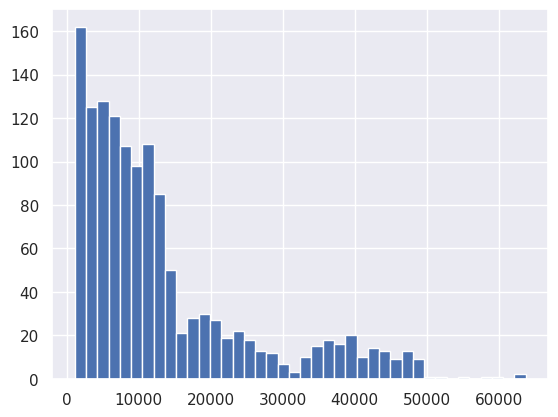

In [ ]:
print(df.shape)
df.charges.hist(bins = 40)

Algo que analizar, según este gráfico, es entender qué está pasando con los datos arriba de los 50,000. Parece haber muy pocos datos de este lado.

In [ ]:
df[df.charges > 50000]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [ ]:
df = df[df.charges < 50000]

En este caso, al ser pocos datos (6 de 1338), eliminaremos estos datos atípicos. A modo didáctico producen más ruido en la predicción que se está intentando hacer en este ejercicio.

Sin embargo es importante aclarar que **NO SE DEBEN ELIMINAR** datos atípicos sin antes conocer a alguien que conozca o sea experto en los datos para que pueda guiarnos mejor sobre ellos.

## Viendo correlaciones
Ahora entendamos nuestros datos, viendo cómo se distribuyen y correlacionan.

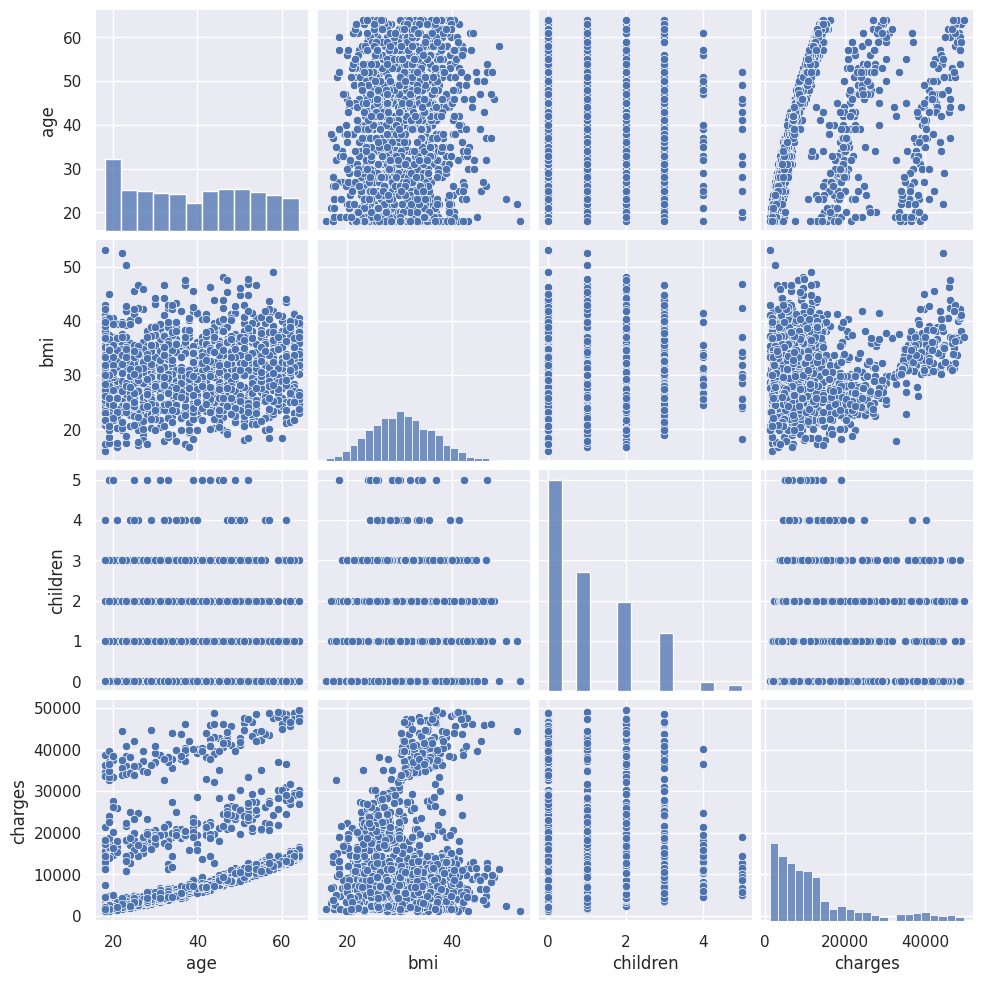

In [ ]:
sns.pairplot(df, height = 2.5)

Puntos interesantes a ver:

- Hay 3 grupos de personas diferentes que se clasifican en edad / cargos, esto puede ser un punto a analizar después.

En general los valores se distribuyen de manera esperada. Con valores extremos en el caso de los cargos, sin embargo esto es de esperarse pues los cargos en los hospitales pueden variar mucho por quedarse un día más en el hospital o incluso por procedimientos extras.

- Parece que los datos están limpios, la variable de índice de masa corporal se distribuye de manera normal o gausiana, lo cual sería esperado en un índice de este tipo.

In [ ]:
correlation_matrix = df.select_dtypes(include = 'number').corr()

<Axes: >

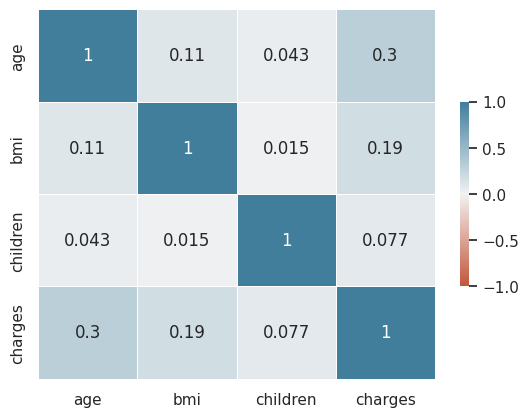

In [ ]:
sns.heatmap(
    data=correlation_matrix,
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

## Utilizando las demás variables
Las demás variables son variables categoricas, sexo, fumador, región. Para poder utilizarlas utilizaremos la función get_dummies de pandas.

Ahora la verás en acción

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


## Creando modelos
Primero se usará un modelo con todas las variables.

In [ ]:
# Separar Columnas para las variables independiente y la variable dependiente
X_cols = list(set(df.columns)-set(['charges']))
y_col = 'charges'

# Separar el conjunto de datos para entrenamiento y para prueba
X_train, X_test, y_train, y_test = train_test_split(df[X_cols], df[y_col], test_size=0.2, random_state=42)

# Escalar las variables dependientes, primero ajustamos el modelo y luego transformamos ya con la media y desviación estandar que se obtuvo en el fit
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predecir el modelo
y_pred = model.predict(X_test_scaled)

# Ver resultados
results_df = X_test.copy()
results_df['Valores reales'] = y_test.values
results_df['Valores predichos'] = y_pred
results_df

,age,region_northwest,sex_male,bmi,children,region_southwest,region_southeast,smoker_yes,Valores reales,Valores predichos
950,57,False,True,18.335,0,False,False,False,11534.87265,9479.181346
1131,27,False,True,45.900,2,True,False,False,3693.42800,9684.364313
1239,25,False,False,42.130,1,False,True,False,3238.43570,7442.890046
298,31,True,True,34.390,3,False,False,True,38746.35510,31789.559604
657,27,True,True,33.155,2,False,False,False,4058.71245,6830.407632
...,...,...,...,...,...,...,...,...,...,...
533,37,False,True,36.190,0,False,True,False,19214.70553,8160.728264
1200,37,True,True,24.320,2,False,False,False,6198.75180,6928.164313
759,18,False,True,38.170,0,False,True,True,36307.79830,26826.775017
1298,33,True,True,27.455,2,False,False,False,5261.46945,6778.319197


## Funciones de métricas
El siguiente punto es calcular las métricas del modelo.

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Eror cuadrático medio: {mse:.2f}')
print(f'Coeficiente de determinación: {r2:.2f}')

Eror cuadrático medio: 35673232.90
Coeficiente de determinación: 0.78


**Conclusiones 01:**
1. Vemos que tiene un mse 35673232, a este le sacamos raiz para ver la variación real y es de 5972, siendo un valor aceptable entre los valores predichos y reales, ya que hay un +- diferencia de 5000
2. Vemos que hay un r2 de 78% lo que significa que esta dentro del rango aceptable, tenemos que analizar a mas detalle para ver si se puede mejorar el modelo

El siguiente código muestra un resumen general de los resultados.

In [ ]:
print("==========Summary==========")
stats.summary(model, X_test_scaled, y_test, X_cols)

# Validación cruzada
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='r2')
print(f'Validación cruzada R²: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')

==========Summary==========
Residuals:
        Min         1Q    Median        3Q        Max
-23780.1997 -1354.5166 1191.2313 2494.5159 11092.2281


Coefficients:
                      Estimate  Std. Error  t value   p value
_intercept        12779.589143  370.593108  34.4842  0.000000
age                3583.456736  371.540568   9.6449  0.000000
region_northwest   -162.395737  403.724365  -0.4022  0.687827
sex_male            -29.160885  370.311755  -0.0787  0.937293
bmi                1668.342893  362.352713   4.6042  0.000006
children            764.088425  366.625094   2.0841  0.038104
region_southwest   -457.436590  422.762660  -1.0820  0.280225
region_southeast   -527.835675  465.471030  -1.1340  0.257823
smoker_yes         9005.020331  338.067595  26.6367  0.000000
---
R-squared:  0.77531,    Adjusted R-squared:  0.76834
F-statistic: 111.28 on 8 features
Validación cruzada R²: 0.73 ± 0.05


**Conclusiones 02:**
1. Vemos los residuales, donde la media, el primer cuartil y el tercer cuartil estan dentro de los valores aceptables, pero el minimo tiene demasiada diferencia, eso significa que hay outliers, y para mejorar este resultado tendremos que buscar que variable dependiente esta afectando esa metrica.
2. Aca lo importante es el valor p, y vemos que hay varios que sobrepasan el 0.05, lo cual debemos sacar estas variables para mejorar el modelo.
3. El R2 como lo vimos anteriormente esta bien, pero el R2 ajustado tiene un valor menor po 0.01 lo cual es aceptable, sin embargo tambien refuerza nuestra conclusion de que hay variables que son poco significativos en el modelo.
4. El F estadístico es mayor a 0.05, es super alto, lo que significa que el modelo trabaja bien con su conjunto de variables independientes, ya que este mide si se trabaja bien en conjunto o sin ninguna variable.
5. Tenemos una validación cruzada excelente, esta metrica divide el conjunto de datos de entrenamiento en 10 y le saca su r2 para cada uno, y hay una variacion de 0.05, lo cual es muy bueno, si tuviera un numero mayor hay riesgo de sobreajuste.

Finalmente tenemos la función que calcula los residuales. Es importante notar que es una simple resta entre los valores reales y los predichos.

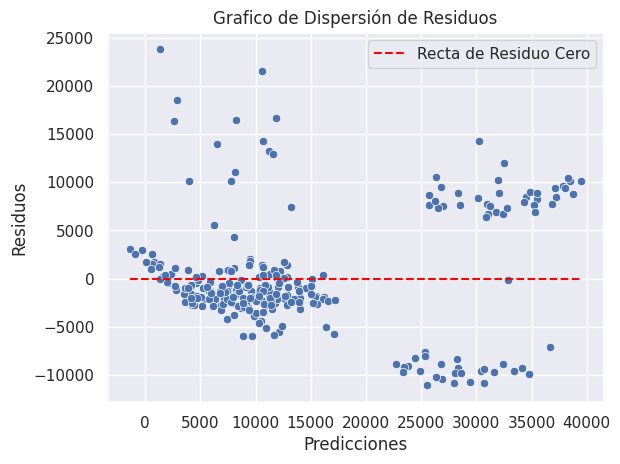

In [ ]:
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.plot([y_pred.min(),y_pred.max()],[0,0], color='red', linestyle='--', label='Recta de Residuo Cero')
plt.legend()
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Grafico de Dispersión de Residuos')
plt.show()

## Segundo modelo
Estos resultados de arriba son buenos, pero se pueden mejorar. Intentaremos hacer algunas transformaciones sobre las variables que pueden ser de utilidad.

In [ ]:
df_second = df.copy()
df_second['age2'] = df_second.age**2
df_second['sobrepeso'] = (df_second.bmi >= 30).astype(int)
df_second['sobrepeso*fumador'] = df_second.sobrepeso * df_second.smoker_yes
df_second

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age2,sobrepeso,sobrepeso*fumador
0,19,27.900,0,16884.92400,False,True,False,False,True,361,0,0
1,18,33.770,1,1725.55230,True,False,False,True,False,324,1,0
2,28,33.000,3,4449.46200,True,False,False,True,False,784,1,0
3,33,22.705,0,21984.47061,True,False,True,False,False,1089,0,0
4,32,28.880,0,3866.85520,True,False,True,False,False,1024,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False,2500,1,0
1334,18,31.920,0,2205.98080,False,False,False,False,False,324,1,0
1335,18,36.850,0,1629.83350,False,False,False,True,False,324,1,0
1336,21,25.800,0,2007.94500,False,False,False,False,True,441,0,0


Analizando el segundo modelo

In [ ]:
# Como vimos anteriormente hay algunas variables que tienen el valor p por encima de 0.05, a esas columnas lo sacaremos
X_cols = ['age2', 'bmi', 'children', 'smoker_yes', 'sobrepeso', 'sobrepeso*fumador']
y_col = 'charges'

X_train, X_test, y_train, y_test = train_test_split(df_second[X_cols], df_second[y_col], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

results_df_second = X_test.copy()
results_df_second['Valores reales'] = y_test.values
results_df_second['Valores predichos'] = y_pred
results_df_second

,age2,bmi,children,smoker_yes,sobrepeso,sobrepeso*fumador,Valores reales,Valores predichos
950,3249,18.335,0,False,0,0,11534.87265,12307.964762
1131,729,45.900,2,False,1,0,3693.42800,6254.685839
1239,625,42.130,1,False,1,0,3238.43570,4940.533296
298,961,34.390,3,True,1,1,38746.35510,39356.129698
657,729,33.155,2,False,1,0,4058.71245,5617.237906
...,...,...,...,...,...,...,...,...
533,1369,36.190,0,False,1,0,19214.70553,6383.290106
1200,1369,24.320,2,False,0,0,6198.75180,7803.017990
759,324,38.170,0,True,1,1,36307.79830,35070.211856
1298,1089,27.455,2,False,0,0,5261.46945,7013.679821


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Eror cuadrático medio: {mse:.2f}')
print(f'Coeficiente de determinación: {r2:.2f}')

Eror cuadrático medio: 16426690.87
Coeficiente de determinación: 0.90


In [ ]:
print("==========Summary==========")
stats.summary(model, X_test_scaled, y_test, X_cols)

# Validación cruzada
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='r2')
print(f'Validación cruzada R²: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')

==========Summary==========
Residuals:
        Min       1Q    Median        3Q       Max
-22118.8836 688.5142 1247.1086 1622.5222 4276.2832


Coefficients:
                       Estimate  Std. Error  t value   p value
_intercept         12779.589143  250.157797  51.0861  0.000000
age2                3805.214295  251.417961  15.1350  0.000000
bmi                  300.641539  346.002204   0.8689  0.385685
children             931.427350  247.042061   3.7703  0.000201
smoker_yes          5344.248286  312.947249  17.0772  0.000000
sobrepeso           -232.256513  377.614380  -0.6151  0.539039
sobrepeso*fumador   5420.224420  308.719544  17.5571  0.000000
---
R-squared:  0.89654,    Adjusted R-squared:  0.89415
F-statistic: 375.49 on 6 features
Validación cruzada R²: 0.85 ± 0.04


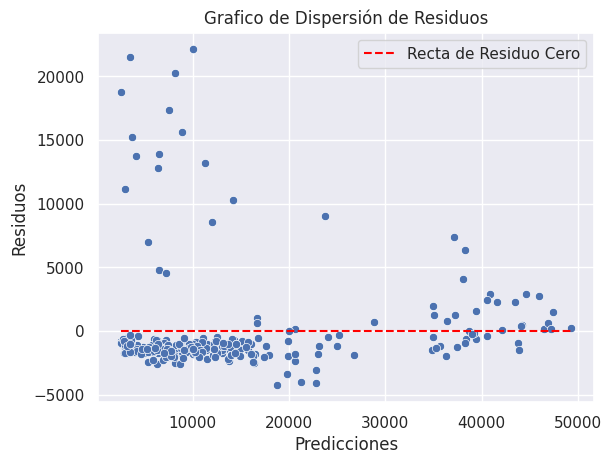

In [ ]:
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.plot([y_pred.min(),y_pred.max()],[0,0], color='red', linestyle='--', label='Recta de Residuo Cero')
plt.legend()
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Grafico de Dispersión de Residuos')
plt.show()

**Conclusiones:**
1. Como vimos al sacar los valores con los valores p mas altos y aumentar estas nuevas columnas el modelo mejor de un 75% a un 95% según el coeficiente de determinación o R2